In [1]:
from mp_api.client import MPRester
import numpy as np
import pandas as pd
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.insertion_electrodes.search(average_voltage = (2.5, 10.0), stability_charge=(0.0, 0.20), energy_grav=(650, 2000), capacity_grav=(150, 2000), max_delta_volume=(0.0, 0.050), fields=[
            "battery_id", "formula_discharge", "average_voltage"
            , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"
        ])

        Fields = "average_voltage", "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge", "fracA_charge", "stability_charge", "max_delta_volume", "stability_discharge", "fracA_discharge"

        def average_field(docs, field):
            vals = [getattr(d, field) for d in docs if getattr(d, field) is not None]
            return sum(vals) / len(vals)


        df = pd.DataFrame([doc.dict() for doc in docs])
        for f in Fields:
            avg = average_field(docs, f)
            print(f"{f}: {avg}")
        print(len(df))
        df.head(20)


except Exception as e:
    print(f"An error occurred: {e}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Retrieving InsertionElectrodeDoc documents: 100%|██████████| 252/252 [00:00<00:00, 2895793.45it/s]

average_voltage: 4.004388408833221
energy_grav: 854.9677878938401
energy_vol: 2876.4616580096927
capacity_grav: 216.62068119053788
capacity_vol: 735.7889672491427
stability_charge: 0.08238042372909349
fracA_charge: 0.040051212382402876
stability_charge: 0.08238042372909349
max_delta_volume: 0.02673512879326014
stability_discharge: 0.042568648596422676
fracA_discharge: 0.19240325249254378
252


In [2]:
# Select only the numeric columns relevant to battery performance
cols_to_analyze = ['average_voltage', 'capacity_grav', 'energy_grav',
                    'max_delta_volume',
                   'fracA_charge', 'fracA_discharge', 'stability_charge', 'stability_discharge']

# Calculate the Pearson correlation
correlation_matrix = df[cols_to_analyze].corr()

"""max_delta_volume
average_voltage
capacity_grav
capacity_vol
energy_grav
energy_vol
fracA_charge
fracA_discharge
stability_charge
stability_discharge"""



correlation_matrix.head()

,average_voltage,capacity_grav,energy_grav,max_delta_volume,fracA_charge,fracA_discharge,stability_charge,stability_discharge
average_voltage,1.000000,-0.408127,0.284854,-0.031169,-0.228063,-0.352538,0.038565,-0.334037
capacity_grav,-0.408127,1.000000,0.744573,0.049914,0.128777,0.440540,0.047596,0.197985
energy_grav,0.284854,0.744573,1.000000,0.042402,-0.040532,0.206910,0.067951,-0.015006
max_delta_volume,-0.031169,0.049914,0.042402,1.000000,-0.045587,0.045509,0.014459,0.038318
fracA_charge,-0.228063,0.128777,-0.040532,-0.045587,1.000000,0.839352,0.092125,-0.206587


In [3]:
"""average_voltage: 3.418653985871179
energy_grav: 456.2583414945248
energy_vol: 1568.2262481737887
capacity_grav: 133.25038940686866
capacity_vol: 462.02675437734047
stability_charge: 0.10874466362721943
fracA_charge: 0.048194773546229114
stability_charge: 0.10874466362721943
max_delta_volume: 0.07652945265126816
stability_discharge: 0.09344139690869716
fracA_discharge: 0.16232393148427837"""


'average_voltage: 3.418653985871179\nenergy_grav: 456.2583414945248\nenergy_vol: 1568.2262481737887\ncapacity_grav: 133.25038940686866\ncapacity_vol: 462.02675437734047\nstability_charge: 0.10874466362721943\nfracA_charge: 0.048194773546229114\nstability_charge: 0.10874466362721943\nmax_delta_volume: 0.07652945265126816\nstability_discharge: 0.09344139690869716\nfracA_discharge: 0.16232393148427837'

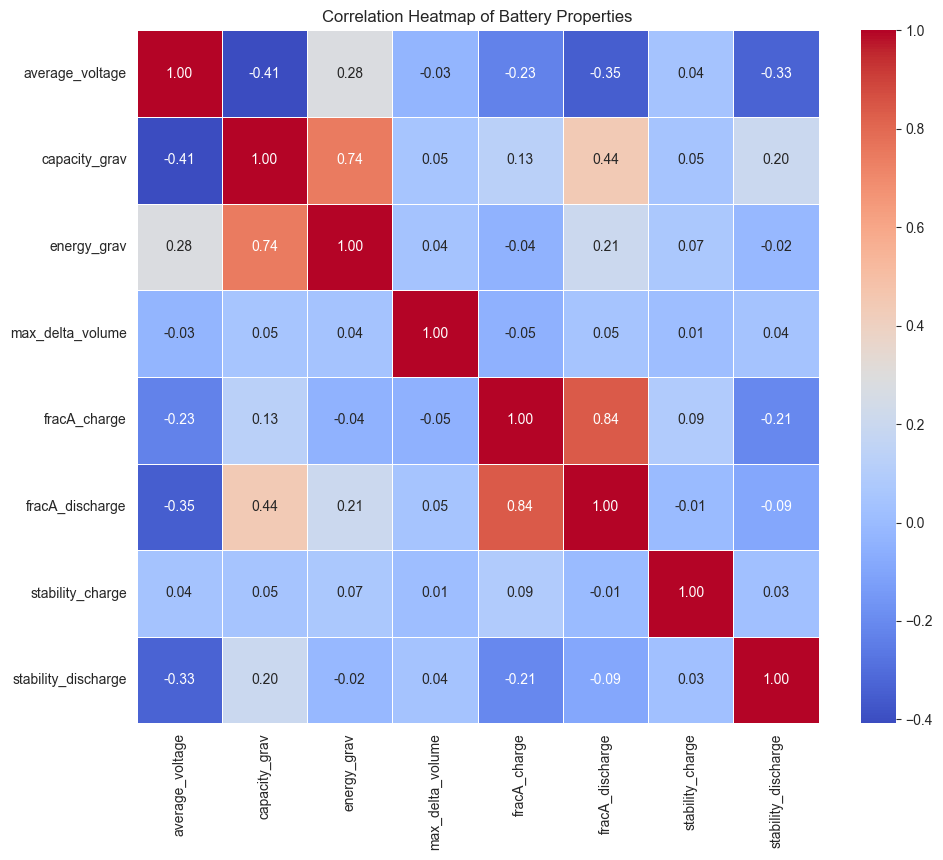


Data Size: 252


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties")
plt.show()
print(f"\nData Size: {len(df)}")

In [ ]:
"""
(Positive)
High Correlation (>0.5):
    - capacity_grav and energy_grav (0.84)
    - fracA_discharge and capacity_grav (0.59)
    - fracA_discharge and fracA_charge (0.75)
Medium Correlation (>0.2):
    - average_voltage and stability_charge (0.29)
    - average_voltage and energy_grav (0.45)
    - energy_grav and stability_charge (0.20)
    - fracA_discharge and max_delta_volume (0.27)
    - fracA_discharge and energy_grav (0.37)

Negative Charge
    - stability_discharge and average_voltage (-0.41)
"""

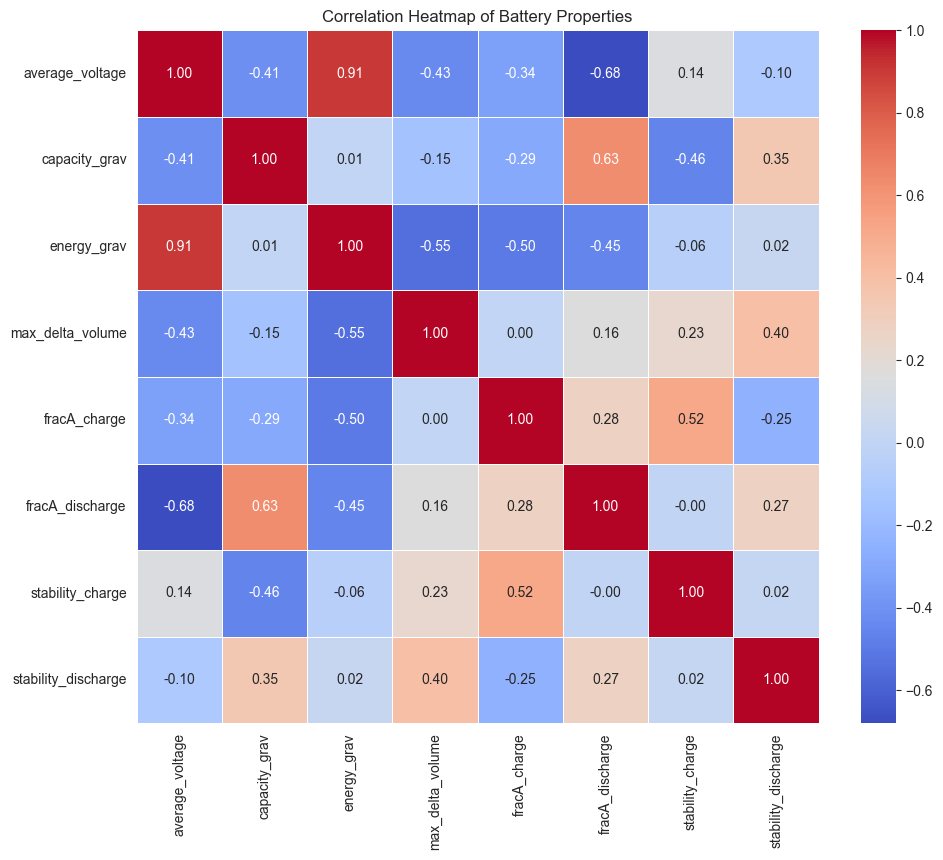

Data Size: 16


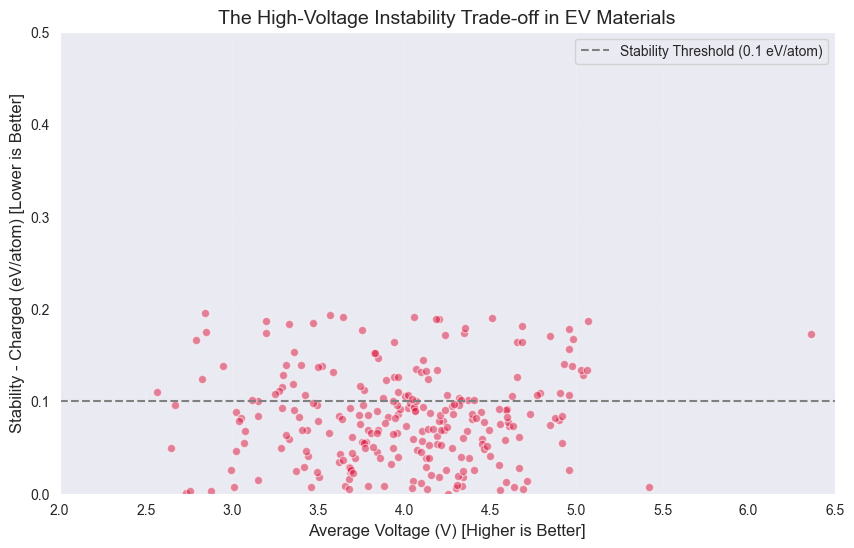

In [24]:
from mp_api.client import MPRester
import matplotlib.pyplot as plt

# Replace with your actual API Key from
voltages = [doc.average_voltage for doc in docs if doc.average_voltage is not None]
instabilities = [doc.stability_charge for doc in docs if doc.stability_charge is not None]

# 3. Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(voltages, instabilities, alpha=0.5, c='crimson', edgecolors='white')

# 4. Formatting to highlight the "Sweet Spot"
plt.title("The High-Voltage Instability Trade-off in EV Materials", fontsize=14)
plt.xlabel("Average Voltage (V) [Higher is Better]", fontsize=12)
plt.ylabel("Stability - Charged (eV/atom) [Lower is Better]", fontsize=12)
plt.axhline(y=0.1, color='gray', linestyle='--', label='Stability Threshold (0.1 eV/atom)')
plt.grid(True, alpha=0.1)
plt.xlim(2.00, 6.5)  # Focus on voltages from 2.5V to 5.0V
plt.ylim(0, 0.5)
plt.legend()

plt.show()